# Generate an image 
using DALL-E

In [10]:
import os

from dotenv import load_dotenv
from openai import OpenAI

import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
### Constants
MODEL = 'dall-e-3'
PROMPT = 'Generate an image representing seaside town like Newquay, \
painted in a style of pop-art, featuring visible brushstrokes, vibrant colours for blue sky, \
a few surfers, some wild rocks on shore, beaches and white waves'
SIZE = '1024x1024'

### Functions

In [25]:
def verify_gpy_api_key():
    #load_dotenv(override=True)
    load_dotenv()
    openai_api_key = os.getenv('OPENAI_API_KEY')
    
    if openai_api_key:
        print(f'OpenAI API Key beginning {openai_api_key[:8]} found.')
    else:
        print('OpenAI API Key not set')

# request DALL-E to generate a painting
def generate_image_general():
    # uses Open AI API to generate an image
    api= OpenAI()
    image_response = api.images.generate(
            model=MODEL,
            prompt=PROMPT,
            size=SIZE,
            n=1,
            response_format='b64_json',
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

In [5]:
# Check whether API Key is set 
verify_gpy_api_key()

OpenAI API Key beginning sk-proj- found.


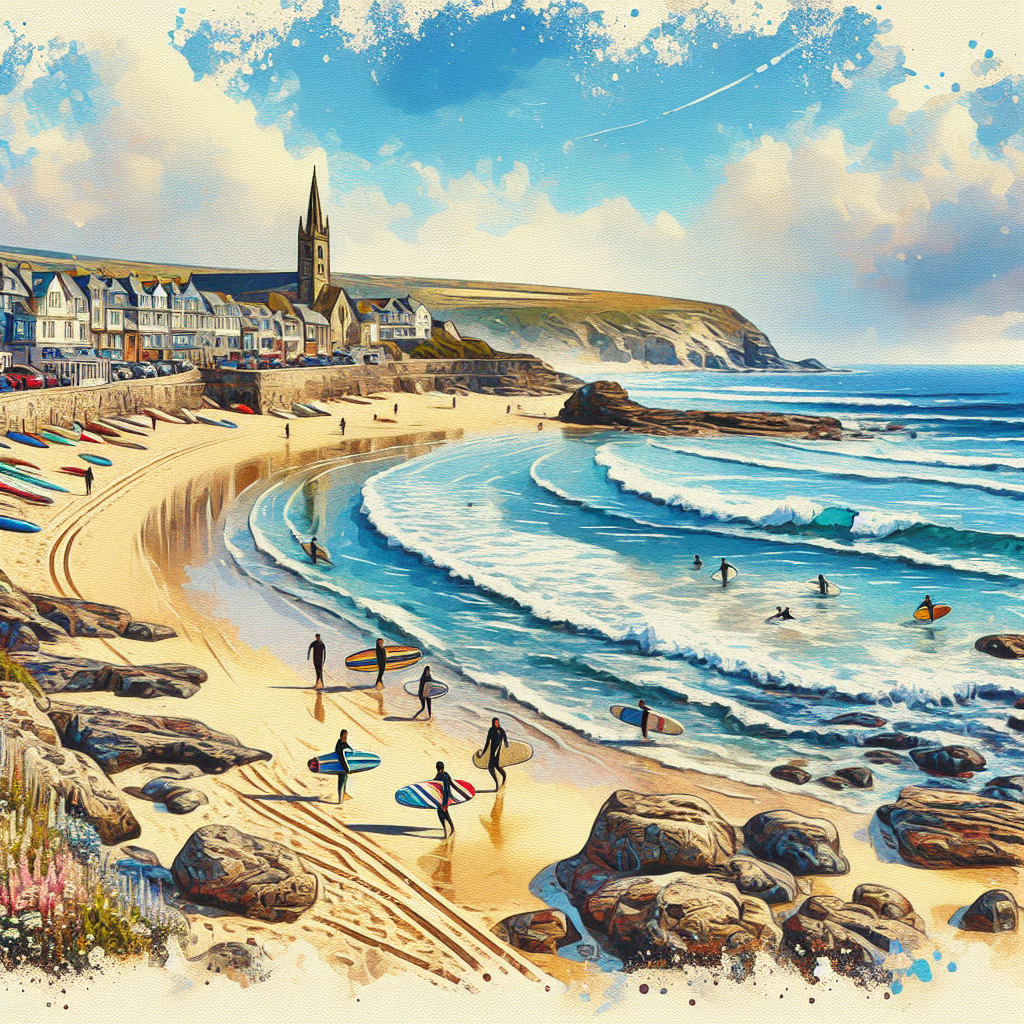

In [32]:
image = generate_image_general()
display(image)

In [33]:
# Save the image
image.save('seaside.png')